In [1]:
import numpy as np
from numpy import tile
import matplotlib.pyplot as plt
#from scipy import linalg as LA
from numpy import linalg as LA
import math,cmath
pi = math.pi
cos = math.cos
sin = math.sin
exp=np.exp
sqrt = math.sqrt
log=np.log

In [24]:
print('Band structure for edge state counting......')
f = open('dispersion.dat','w')
nk=100
#Initialization of the Model parameter
lmd =0
count=1
tx=1.0
ty=1.0
gama=0.00
n=102 #number of site along open boundary condition choose it to be N*q-1 where N= some integer
nn=0.0
ntot=1
U=0.0
mu=0.0
mu=mu-U*ntot/2
#initialise the matrix
sigmaup=np.zeros((n,n),dtype=complex)
sigmadw=np.zeros((n,n),dtype=complex)
sigmaud=np.zeros((n,n),dtype=complex)
sigmadu=np.zeros((n,n),dtype=complex)
#full matrix
comp=np.zeros((2*n,2*n),dtype=complex)
energy=np.zeros((nk,2*n))
alpha=5


Band structure for edge state counting......


In [25]:
for i in range(nk):
    ky =i*((2.0*pi)/nk)
    for q in range(n):
        for p in range(n):
            x=p
            y=q
            if (p==q):
                sigmaup[q,p]=-ty*(exp(1j*ky)*exp(1j*2.0*x*pi/alpha)+exp(-1j*ky)*exp(-1j*2.0*x*pi/alpha))+((-1)**x)*lmd+mu+(-1)**y*U*nn
    for q in range(n):
        for  p in range(n):
            if ((p-q)==1):
                sigmaup[q,p]=-tx*cos(2*pi*gama) #(off diagonal)
    for q in range(n):
        for p in range(n):
            if ((q-p)==1):
                sigmaup[q,p]=-tx*cos(2*pi*gama)
                
    for q in range(n):
        for p in range(n):
            x=p
            y=q
            if(p==q):
                sigmadw[q,p]=-ty*(exp(1j*ky)*exp(-1j*2.0*x*pi/alpha)+exp(-1j*ky)*exp(1j*2.0*x*pi/alpha))+((-1)**x)*lmd+mu+(-1)**y*U*nn;
    for q in range(n):
        for p in range(n):
            if ((p-q)==1):
                sigmadw[q,p]=-tx*cos(2*pi*gama)
    for q in range(n):
        for p in range(n):
            if ((q-p)==1):
                sigmadw[q,p]=-tx*cos(2*pi*gama)
                
    for q in range(n):
        for p in range(n):
            if ((p-q)==1):
                sigmaud[q,p]=-tx*(1j*sin(2*pi*gama))

    for q in range(n):
        for p in range(n):
            if ((q-p)==1):
                sigmaud[q,p]=-tx*(-1j*sin(2*pi*gama))

    for q in range(n):
        for p in range(n):
            if ((p-q)==1):
                sigmadu[q,p]=-tx*(1j*sin(2*pi*gama))
                
    for q in range(n):
        for p in range(n):
            if ((q-p)==1):
                sigmadu[q,p]=-tx*(-1j*sin(2*pi*gama))


    
    
    for q in range(n):
        for p in range(n):
            comp[2*q,2*p]=sigmaup[q,p]
    
    for q in range(n):
        for p in range(n):
            comp[2*q-1,2*p-1]=sigmadw[q,p]

    for q in range(n):
        for p in range(n):
            comp[2*q,2*p-1]=sigmaud[q,p]
    
    for q in range(n):
        for p in range(n):
            comp[2*q-1,2*p]=sigmadu[q,p]
    
    #print(comp.shape)
    
    Ekk=sigmaup
    wk=LA.eigvals(Ekk)
    wkk=np.array(wk.real)
    wkk=np.sort(wkk)
    for j in range(n):
        energy[i,j]=wkk[j]
print(energy.shape)

(100, 204)


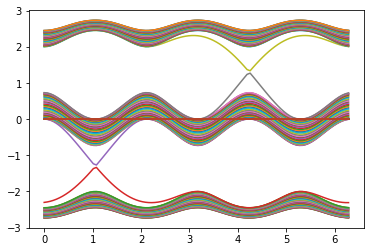

In [26]:
ky=np.linspace(0,2*pi,nk)

for i in range(2*n):
    #plt.plot(ky[i]*np.ones(2*n),energy[i,:],'o')
    plt.plot(ky,energy[:,i],'-')
 
plt.show()